In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = [16, 9]

In [78]:
file_name = './Cropped_Images/012_2_08262019_P6_NFIX10-5.1_L.jpg'
im = cv2.imread(file_name)
im[:,:,0]

array([[162, 166, 162, ..., 123, 120, 124],
       [164, 167, 171, ...,  98,  99, 102],
       [166, 168, 169, ..., 126, 128, 130],
       ...,
       [166, 171, 171, ..., 143, 136, 142],
       [163, 167, 169, ..., 113, 105, 103],
       [164, 167, 169, ..., 106,  98,  92]], dtype=uint8)

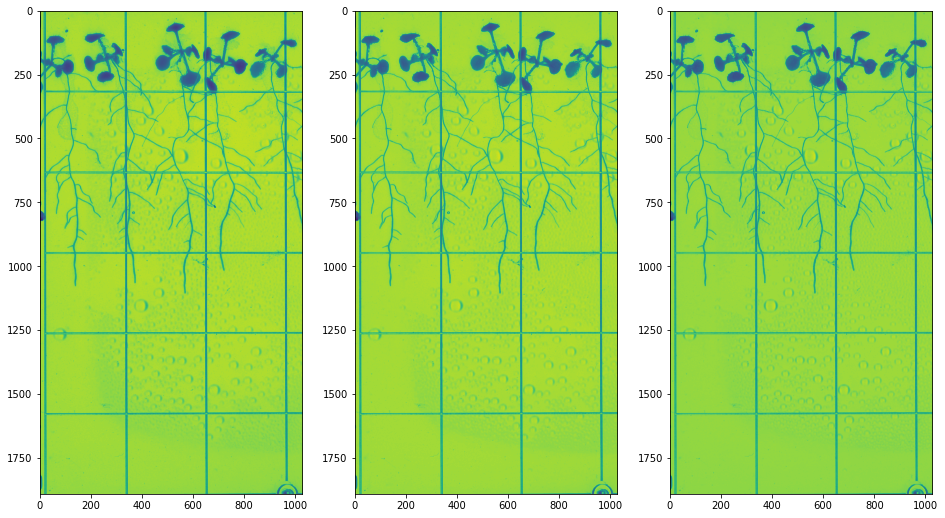

In [79]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(im[:,:,0])
axs[1].imshow(im[:,:,1])
axs[2].imshow(im[:,:,2])
plt.show()

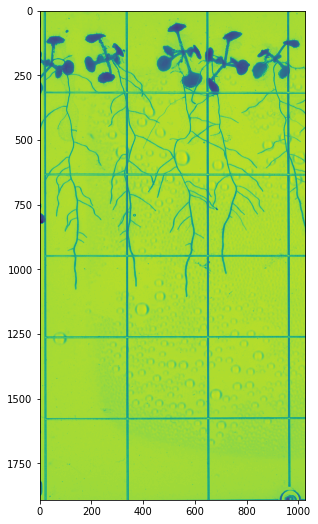

In [80]:
grey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
grey.shape
plt.imshow(grey[:,:])

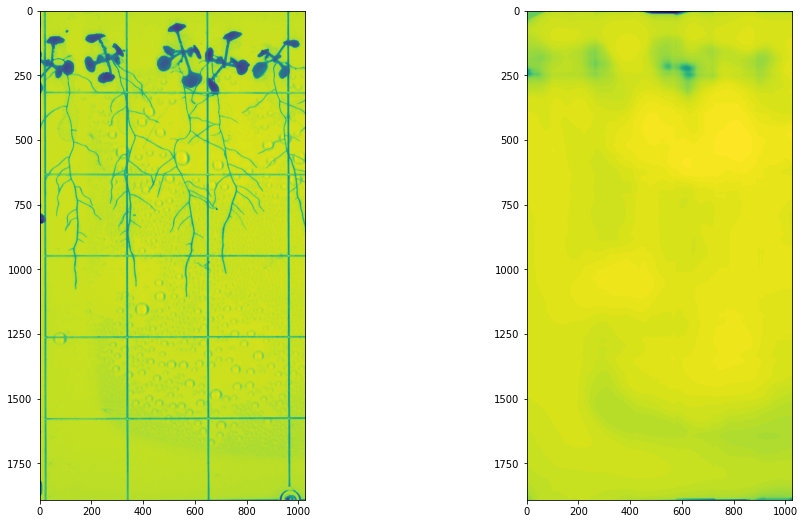

In [86]:
#generate "foreground" -> leaves + roots
grey_denoised = cv2.medianBlur(grey, 5)
#generate "background" -> plate + condensation
grey_blur = cv2.medianBlur(grey, 151)

#view both plots
fig, axs = plt.subplots(1,2)
axs[0].imshow(grey_denoised)
axs[1].imshow(grey_blur)
plt.show()

0.10770312847047984

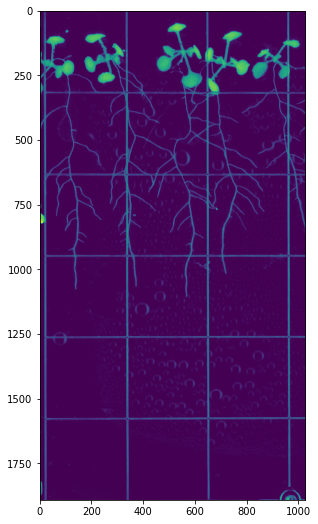

In [92]:
grey_diff = cv2.subtract(grey_blur, grey_denoised)
plt.imshow(grey_diff)
_, binary = cv2.threshold(grey_diff, 15, 255, cv2.THRESH_BINARY)

# nonzero = np.count_nonzero(binary) 
# print(nonzero)
# total = binary.shape[0] *  binary.shape[1]
# print(total)
# prop_plant = nonzero / total

prop_plant = np.count_nonzero(binary) / (binary.shape[0] *  binary.shape[1])
prop_plant